## 1. Getting Started: Airbnb Copenhagen

Kim Tranberg - 172394

Markéta Lapčíková - 304125

Deniss Puzirevs - 304579

In [1]:
import pandas as pd
import sklearn as sk

# 1 Load and select columns

In [2]:
# load the data
data = pd.read_csv('listings_new.csv')
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]
data_limited.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,$803.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,"$2,600.00",7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,"$1,401.00",4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nrrebro,55.69388,12.54725,Entire home/apt,$793.00,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,"$3,350.00",3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


In [3]:
data_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17027 entries, 0 to 17026
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17027 non-null  int64  
 1   name                            17027 non-null  object 
 2   host_id                         17027 non-null  int64  
 3   host_name                       17026 non-null  object 
 4   neighbourhood_cleansed          17027 non-null  object 
 5   latitude                        17027 non-null  float64
 6   longitude                       17027 non-null  float64
 7   room_type                       17027 non-null  object 
 8   price                           17027 non-null  object 
 9   minimum_nights                  17027 non-null  int64  
 10  number_of_reviews               17027 non-null  int64  
 11  last_review                     14038 non-null  object 
 12  review_scores_rating            

# 2 Handle missing values

In [4]:
# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,$803.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,"$2,600.00",7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,"$1,401.00",4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nrrebro,55.69388,12.54725,Entire home/apt,$793.00,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,"$3,350.00",3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


In [5]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13994 entries, 0 to 16969
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13994 non-null  int64  
 1   name                            13994 non-null  object 
 2   host_id                         13994 non-null  int64  
 3   host_name                       13994 non-null  object 
 4   neighbourhood_cleansed          13994 non-null  object 
 5   latitude                        13994 non-null  float64
 6   longitude                       13994 non-null  float64
 7   room_type                       13994 non-null  object 
 8   price                           13994 non-null  object 
 9   minimum_nights                  13994 non-null  int64  
 10  number_of_reviews               13994 non-null  int64  
 11  last_review                     13994 non-null  object 
 12  review_scores_rating            

# 3 Fix 'neighbourhood_cleansed'

In [6]:
# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

# replace Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

['Nrrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Amager Vest' 'sterbro'
 'Frederiksberg' 'Bispebjerg' 'Valby' 'Amager st' 'Vanlse' 'Brnshj-Husum']
['Nørrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Amager Vest'
 'Østerbro' 'Frederiksberg' 'Bispebjerg' 'Valby' 'Amager st' 'Vanløse'
 'Brønshøj-Husum']


In [7]:
# change values in price from $650 to 650, then multiply by 6.94 to get DKK

data_filtered["price"] = data_filtered["price"].str.replace('$', '')
data_filtered["price"] = data_filtered["price"].str.replace(',', '')
data_filtered["price"] = data_filtered["price"].astype(float)
data_filtered["price"] = data_filtered["price"] * 6.94
data_filtered.head()

/tmp/ipykernel_387104/3899755081.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_filtered["price"] = data_filtered["price"].str.replace('$', '')


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nørrebro,55.68641,12.54741,Entire home/apt,5572.82,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,18044.00,7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,9722.94,4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nørrebro,55.69388,12.54725,Entire home/apt,5503.42,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,23249.00,3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


# 4 Wordcloud from AirBnB name

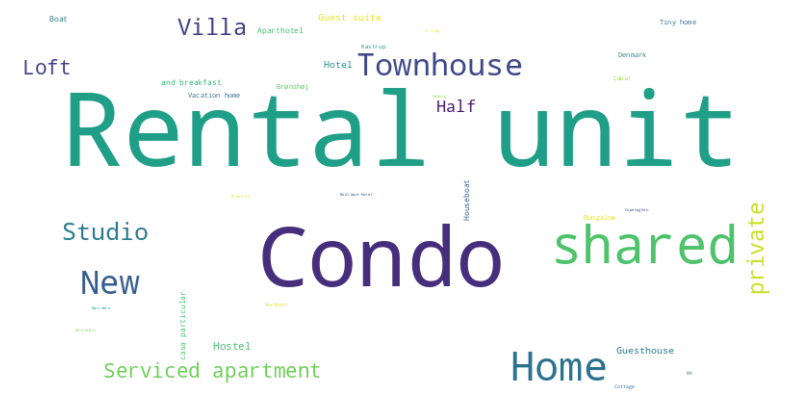

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# display a word cloud from the name column in data_filtered
text = ' '.join(data_filtered.name)

nono_words = ['Copenhagen', 'København','in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh','Ballerup','Hellerup','Valby','Vanløse','Brønhøj']

# need to upgrade Pillow to make it work on linux
# pip install --upgrade Pillow
# restart jupyter kernel after installing/upgrading Pillow

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nono_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


# 5 Wordcloud from host name

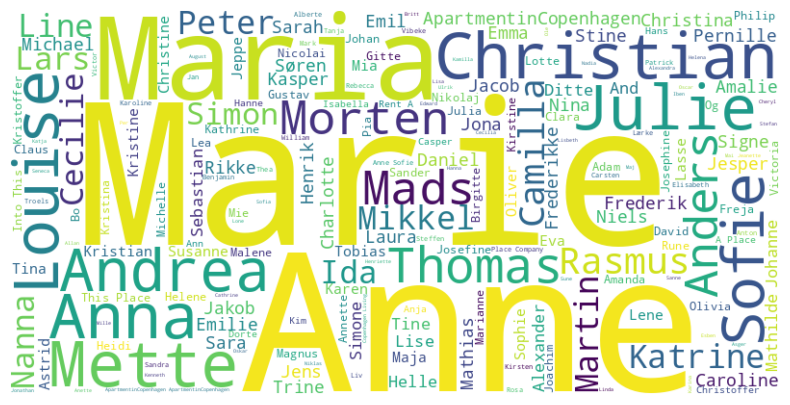

In [9]:
text = ' '.join(data_filtered['host_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nono_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

Female names from dansk statistik
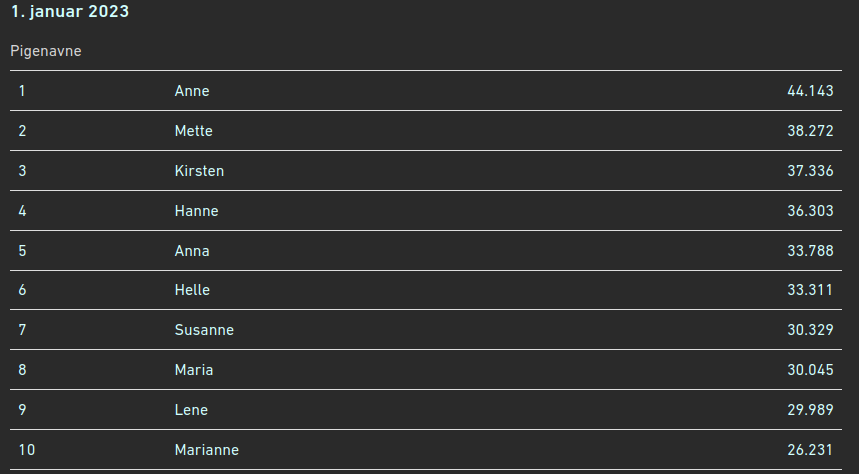

# 6 Bin the price

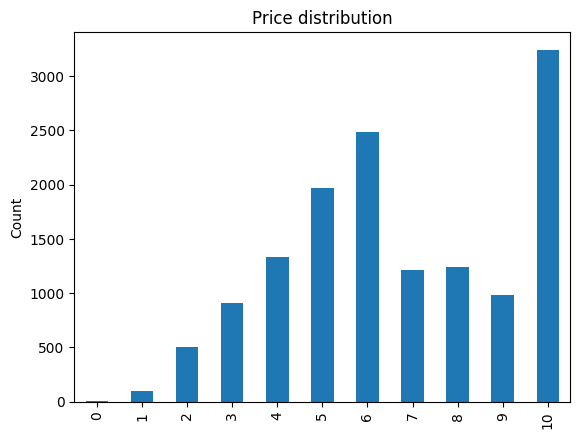

In [10]:
import numpy as np
# create 11 bins for the cost coulumn starting at 0 and having the 11th bin above 10000

# Define the bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]

data_bins = data_filtered
# Create a new column 'bins' with the bin edges
data_bins['price_bins'] = pd.cut(data_filtered['price'], bins=bin_edges, labels=False)

# Create a basic bar plot
# plot the price bins in numbered order
data_bins['price_bins'].value_counts().sort_index().plot(kind='bar')

# Add lables and title
plt.ylabel('Count')
plt.title('Price distribution')

# Display the plot
plt.show()

Vissualize the distribution of selected columns

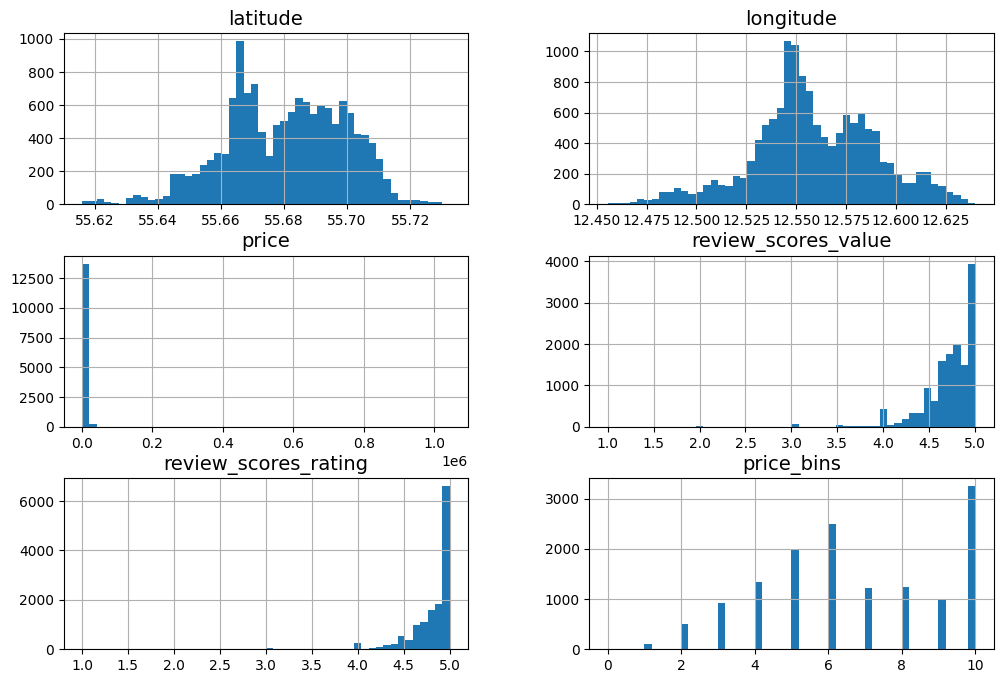

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# show these columnds
columns = ['latitude', 'longitude', 'price','review_scores_value','review_scores_rating','price_bins']

data_bins[columns].hist(bins=50, figsize=(12, 8))
plt.show()

# 7 Map plots

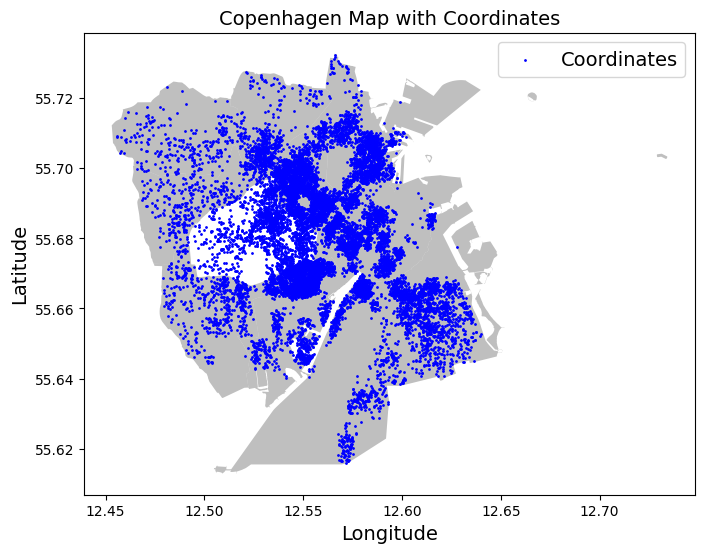

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
copenhagen.plot(ax=plt.gca(), alpha=0.5, color='gray')
plt.scatter(data_bins['longitude'], data_bins['latitude'], c='blue', marker='o', label='Coordinates', s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Copenhagen Map with Coordinates')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


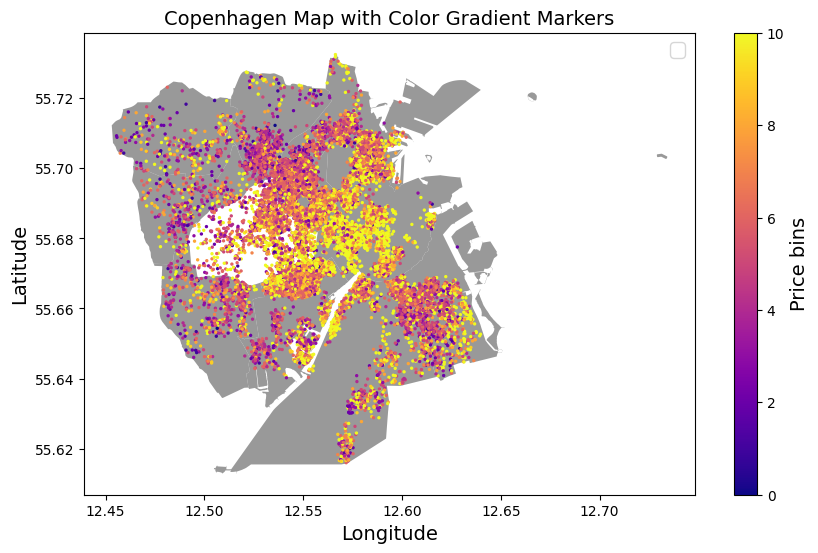

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.8, color='gray')

# Create a scatter plot with a color gradient
scatter = ax.scatter(
    data_bins['longitude'],
    data_bins['latitude'],
    c=data_bins['price_bins'],
    cmap='plasma',
    marker='o',
    s=2,  # Adjust marker size as needed
)

# Add colorbar
plt.colorbar(scatter, label='Price bins')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Color Gradient Markers')
plt.legend()
plt.show()

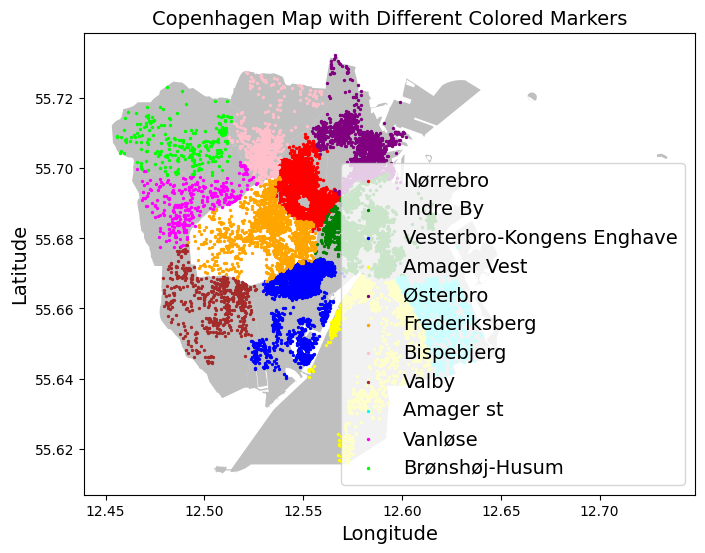

In [14]:
# Neigbourhood grouping
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# distinct neighbourhoods
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
neighbourhood_colors = dict()
colors = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "brown", "cyan", "magenta", "lime"]

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# connect the colors to categories
for i, n in enumerate(neighbourhoods):
    neighbourhood_colors[n] = colors[i]

# Create subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.5, color='gray')

# Create a scatter plot with different colors for each category
for neighbourhood, color in neighbourhood_colors.items():
    subset = data_bins[data_bins['neighbourhood_cleansed'] == neighbourhood]
    ax.scatter(
        subset['longitude'],
        subset['latitude'],
        color=color,
        label=neighbourhood,
        marker='o',
        s=2,  # marker size
    )

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Different Colored Markers')
plt.legend()
plt.show()

# 8 Boxplots

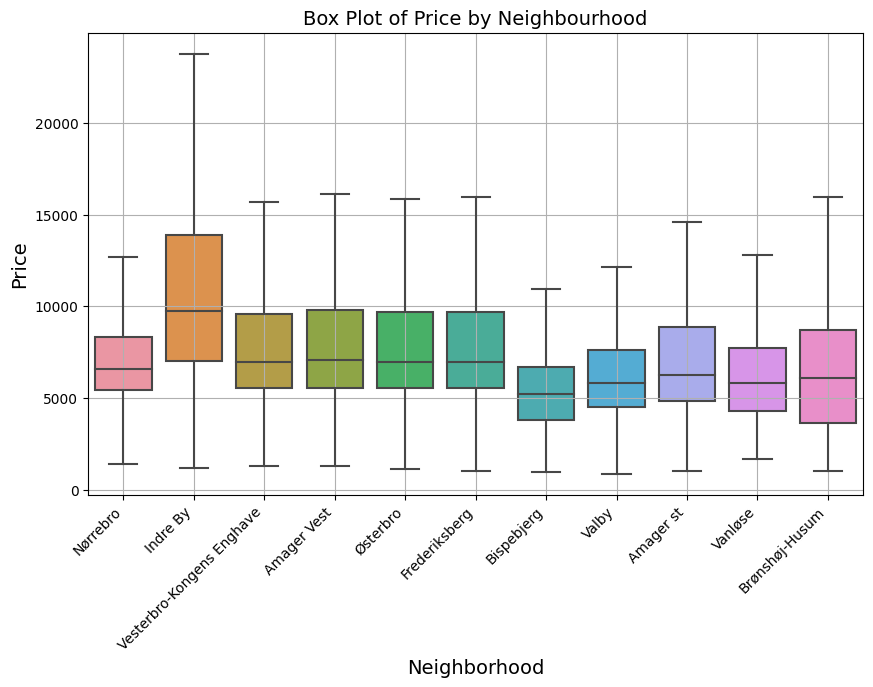

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
# showfliers=False will hide the outliers
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Box Plot of Price by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

This boxplot shows us that rentals located in the centre has the most expensive flats, both mode and highest non-outlier value.

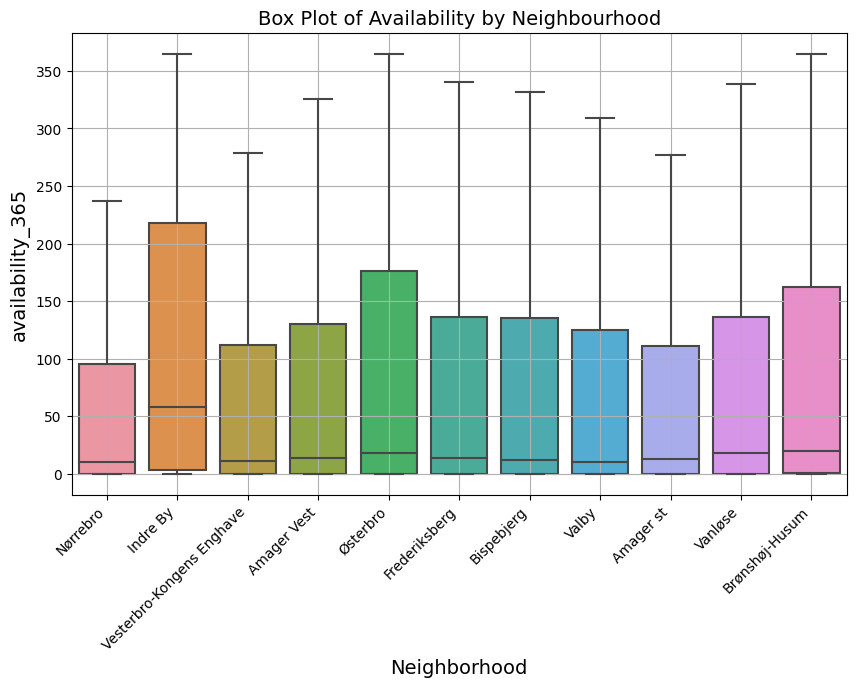

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('availability_365')
plt.title('Box Plot of Availability by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

Mode of central rentals is much higher than the mode of the other neighbourhoods.

# 9 Bar chart

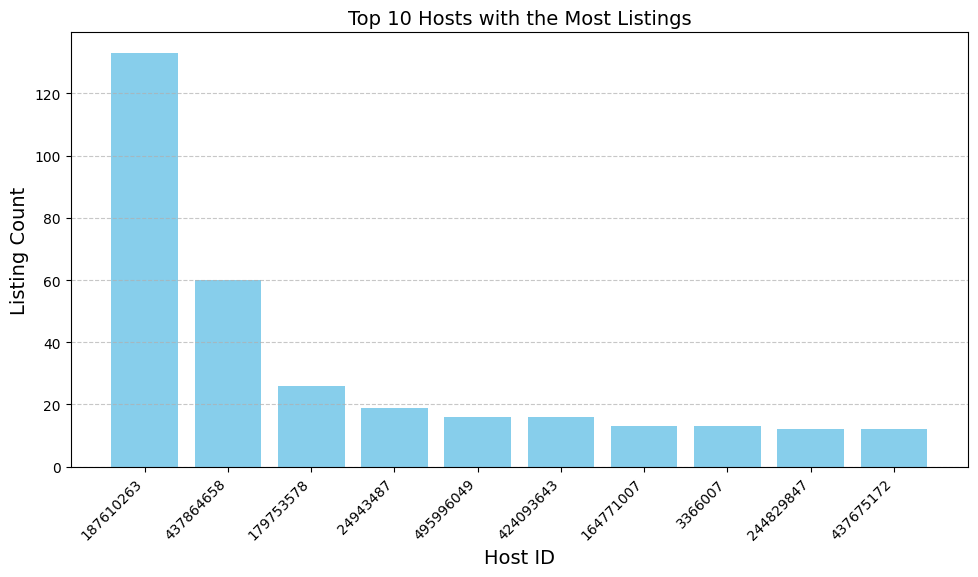

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of listings for each host
host_listing_counts = data_bins['host_id'].value_counts().reset_index()
host_listing_counts.columns = ['host_id', 'listing_count']

# Sort the hosts by listing count and select the top 10
top_hosts = host_listing_counts.nlargest(10, 'listing_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_hosts['host_id'].astype(str), top_hosts['listing_count'], color='skyblue')

# Add labels and title
plt.xlabel('Host ID')
plt.ylabel('Listing Count')
plt.title('Top 10 Hosts with the Most Listings')

# Customize the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10 Descriptive analysis

In [18]:
# group each roomtype by neighbourhood
roomtype = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe()

# calculate mode for each neighbourhood
mode = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].apply(lambda x: x.mode()[0])

# calculate median for each neighbourhood
median = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].median()

# group description, mode and median into one dataframe
roomtype = pd.concat([roomtype, mode, median], axis=1)

# rename columns
roomtype.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'median']

roomtype # Descriptive statistics for each neighbourhood and room type on price

count          mean           std  \
neighbourhood_cleansed    room_type                                             
Amager Vest               Entire home/apt  1076.0   8946.962862   7061.374171   
                          Private room      169.0   6763.296923  34404.340835   
                          Shared room         2.0   5517.300000    726.283517   
Amager st                 Entire home/apt   888.0   8068.101689   5184.360699   
                          Hotel room          3.0  10967.513333   1771.554231   
                          Private room      113.0   3831.555575   1914.565782   
                          Shared room         1.0  15968.940000           NaN   
Bispebjerg                Entire home/apt   539.0   6641.155102  13200.943569   
                          Private room       86.0   3229.440233   2172.428180   
                          Shared room         2.0   3296.500000   3189.758690   
Brønshøj-Husum            Entire home/apt   193.0   7904.588083   4176.870076   
                          Private room       56.0   3222.266786   1599.380957   
                          Shared room         2.0   1519.860000    186.478200   
Frederiksberg             Entire home/apt  1307.0   9067.022387  12300.090708   
                          Private room      147.0   4752.861361   4945.772905   
Indre By                  Entire home/apt  1938.0  12281.296873  12462.603193   
                          Hotel room          9.0   8378.893333   4913.173233   
                          Private room      155.0   5200.477806   3028.486675   
                          Shared room         6.0   2403.553333    460.194046   
Nørrebro                  Entire home/apt  2315.0   7474.610834   3579.853402   
                          Private room      203.0   9508.517931  73055.793436   
                          Shared room         3.0   3652.753333    611.048510   
Valby                     Entire home/apt   450.0   7098.185733   4068.835990   
                          Private room       77.0   3618.894545   2194.079640   
Vanløse                   Entire home/apt   279.0   6908.260072   3430.933317   
                          Private room       35.0   2975.078857   1224.223465   
Vesterbro-Kongens Enghave Entire home/apt  2218.0   8577.132858   4975.055747   
                          Private room      252.0   4310.373413   2571.418435   
                          Shared room         3.0   3925.726667   4121.216806   
Østerbro                  Entire home/apt  1329.0   8796.792039   9364.624345   
                          Private room      138.0   4845.528116   5247.128935   

                                                min        25%       50%  \
neighbourhood_cleansed    room_type                                        
Amager Vest               Entire home/apt   2186.10   6105.465   7634.00   
                          Private room      1325.54   2789.880   3470.00   
                          Shared room       5003.74   5260.520   5517.30   
Amager st                 Entire home/apt   1665.60   5401.055   6641.58   
                          Hotel room        9306.54  10035.240  10763.94   
                          Private room      1013.24   2776.000   3470.00   
                          Shared room      15968.94  15968.940  15968.94   
Bispebjerg                Entire home/apt   1630.90   4511.000   5552.00   
                          Private room       971.60   2227.740   2859.28   
                          Shared room       1041.00   2168.750   3296.50   
Brønshøj-Husum            Entire home/apt   2047.30   5205.000   7009.40   
                          Private room      1041.00   2082.000   2907.86   
                          Shared room       1388.00   1453.930   1519.86   
Frederiksberg             Entire home/apt   1041.00   6010.040   7585.42   
                          Private room      1381.06   2779.470   3615.74   
Indre By                  Entire home/apt   2776.00   7634.000  10340.60   
  

# 11 Top 10 rating

In [19]:
import folium

# Sort the DataFrame by 'review_scores_rating' in descending order and select the top 10
top_10_ratings = data_bins.nlargest(10, 'review_scores_rating')

# Create a Folium map centered around the first entry in the top 10
map_center = [top_10_ratings.iloc[0]['latitude'], top_10_ratings.iloc[0]['longitude']]
m = folium.Map(location=map_center, zoom_start=13)

# Add markers for the top 10 highest-rated entries
for index, row in top_10_ratings.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Rating: {row['review_scores_rating']}",
                  icon=folium.Icon(icon='star')).add_to(m)

# Save the map as an HTML file (optional)
m.save('top_10_ratings_map.html')

top_10_ratings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bins
13,343137,Rental unit in Frederiksberg · ★5.0 · 3 bedroo...,1741097,Josephine,Frederiksberg,55.677610,12.546730,Entire home/apt,13845.30,3,...,4.85,4.81,5.00,4.89,4.96,4.70,0.21,1,192,10
14,37159,Rental unit in Copenhagen · ★5.0 · 3 bedrooms ...,160390,Jeanette,Indre By,55.685470,12.565430,Entire home/apt,18030.12,5,...,4.78,5.00,5.00,5.00,4.89,4.78,0.07,1,180,10
16,38499,Rental unit in Copenhagen · ★5.0 · 2 bedrooms ...,122489,Christina,Indre By,55.684288,12.573019,Entire home/apt,13880.00,3,...,4.56,4.89,5.00,5.00,5.00,4.89,0.10,1,6,10
22,71168,Condo in Frederiksberg · ★5.0 · 2 bedrooms · 2...,141625,Pernille & Frederik,Frederiksberg,55.677886,12.549401,Entire home/apt,11798.00,4,...,5.00,4.91,4.91,5.00,5.00,5.00,0.09,1,16,10
37,135777,Rental unit in Copenhagen · ★5.0 · 1 bedroom ·...,665428,Sofie,Nørrebro,55.692230,12.542120,Entire home/apt,5170.30,5,...,5.00,5.00,5.00,5.00,5.00,5.00,0.04,1,0,5
40,154529,Rental unit in Frederiksberg · ★5.0 · 1 bedroo...,743327,Cecilie,Frederiksberg,55.687010,12.533480,Entire home/apt,6204.36,6,...,5.00,4.67,5.00,5.00,5.00,4.89,0.18,1,310,6
46,455191,Home in Copenhagen · ★5.0 · 2 bedrooms · 3 bed...,1784959,Berit,Østerbro,55.713160,12.572260,Entire home/apt,10312.84,5,...,5.00,4.91,5.00,5.00,4.91,4.86,0.21,1,282,10
64,240802,Rental unit in Copenhagen · ★5.0 · 3 bedrooms ...,1263184,Mette,Nørrebro,55.688680,12.560860,Entire home/apt,13435.84,2,...,5.00,5.00,4.89,5.00,5.00,4.89,0.06,1,79,10
65,487549,Rental unit in Copenhagen · ★5.0 · 3 bedrooms ...,2412622,Maj,Vesterbro-Kongens Enghave,55.670290,12.541270,Entire home/apt,8328.00,7,...,5.00,5.00,5.00,5.00,5.00,5.00,0.34,1,133,8
71,489653,Rental unit in Copenhagen · ★5.0 · 2 bedrooms ...,2399319,Thomas,Nørrebro,55.691030,12.544360,Entire home/apt,6377.86,6,...,5.00,5.00,5.00,5.00,4.93,4.87,0.11,1,4,6


In [20]:
# Display the map
m

# 12 Preprocessing and feature engineering

In [21]:
# remove shared rooms and hotel rooms
data_bins = data_bins[data_bins.room_type != 'Shared room']
data_bins = data_bins[data_bins.room_type != 'Hotel room']

# do one hot encoding on selected columns

# one hot encoding on neighbourhoods
df_encoded = pd.get_dummies(data_bins, columns=['neighbourhood_cleansed'], prefix='Neighbourhood')

# should i be done on room type?
df_encoded = pd.get_dummies(df_encoded, columns=['room_type'], prefix='room_type')

print(df_encoded.columns)

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_bins',
       'Neighbourhood_Amager Vest', 'Neighbourhood_Amager st',
       'Neighbourhood_Bispebjerg', 'Neighbourhood_Brønshøj-Husum',
       'Neighbourhood_Frederiksberg', 'Neighbourhood_Indre By',
       'Neighbourhood_Nørrebro', 'Neighbourhood_Valby',
       'Neighbourhood_Vanløse', 'Neighbourhood_Vesterbro-Kongens Enghave',
       'Neighbourhood_Østerbro', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')


In [22]:
data_bins['room_type'].value_counts()

Entire home/apt    12532
Private room        1431
Name: room_type, dtype: int64

# 13 Affordability

In [23]:
# Calculate the median price
median_price = df_encoded['price'].median()

data_affordability = df_encoded
# Create the 'price_group' column where 1 indicates above median, and 0 indicates below median
data_affordability['expensiveness'] = np.where(data_affordability['price'] > median_price, 1, 0)

print(median_price)

# Display the DataFrame
data_affordability.head()

6940.0


,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,Neighbourhood_Frederiksberg,Neighbourhood_Indre By,Neighbourhood_Nørrebro,Neighbourhood_Valby,Neighbourhood_Vanløse,Neighbourhood_Vesterbro-Kongens Enghave,Neighbourhood_Østerbro,room_type_Entire home/apt,room_type_Private room,expensiveness
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,55.68641,12.54741,5572.82,3,173,2023-01-02,...,0,0,1,0,0,0,0,1,0,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,55.69307,12.57649,18044.00,7,59,2022-08-09,...,0,1,0,0,0,0,0,1,0,1
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,55.67059,12.55651,9722.94,4,118,2022-09-11,...,0,0,0,0,0,1,0,1,0,1
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,55.69388,12.54725,5503.42,5,92,2023-03-22,...,0,0,1,0,0,0,0,1,0,0
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,55.67602,12.57540,23249.00,3,326,2023-06-20,...,0,1,0,0,0,0,0,1,0,1


In [24]:
data_affordability['expensiveness'].value_counts()

0    7256
1    6707
Name: expensiveness, dtype: int64

In [25]:
corr_matrix = data_affordability.corr(numeric_only=True)
corr_matrix["expensiveness"].sort_values(ascending=False)

expensiveness                              1.000000
price_bins                                 0.861362
room_type_Entire home/apt                  0.276199
price                                      0.269561
Neighbourhood_Indre By                     0.232364
availability_365                           0.214213
review_scores_location                     0.151500
longitude                                  0.135597
calculated_host_listings_count             0.091531
review_scores_rating                       0.045510
review_scores_cleanliness                  0.033286
review_scores_checkin                      0.032072
Neighbourhood_Vesterbro-Kongens Enghave    0.016363
Neighbourhood_Amager Vest                  0.016084
Neighbourhood_Frederiksberg                0.013885
review_scores_communication                0.013180
review_scores_accuracy                     0.010080
id                                         0.005849
review_scores_value                        0.004097
Neighbourhoo

# 14 Models

In [26]:
# select what features to keep

keep = ['expensiveness','latitude', 'longitude', 'room_type_Entire home/apt','room_type_Private room']

final_df = data_affordability[keep]
final_df.columns

Index(['expensiveness', 'latitude', 'longitude', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Naïve Bayes

# Split data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Perform 5-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy: 0.5846759756534192
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.19      0.31      1393
           1       0.55      0.98      0.70      1400

    accuracy                           0.58      2793
   macro avg       0.73      0.58      0.51      2793
weighted avg       0.73      0.58      0.51      2793

Cross-validation Scores: [0.58789832 0.56534193 0.56211958 0.54727794 0.57700573]
Mean Accuracy: 0.5679286991527119


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# k-Nearest Neighbor (k-NN)

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test.values) 
# Got an error here. had to follow this instruction to make it work:
# https://github.com/scikit-learn/scikit-learn/issues/26768#issuecomment-1676406055

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.656641604010025
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1393
           1       0.66      0.64      0.65      1400

    accuracy                           0.66      2793
   macro avg       0.66      0.66      0.66      2793
weighted avg       0.66      0.66      0.66      2793



/home/gimpe/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(knn_classifier, X.values, y.values, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.64017186 0.66738274 0.65628357 0.65222063 0.67729226]
Mean Accuracy: 0.6586702121656988


# 15 Conclusion

We think that using price_bins as a feature for our models would make them too reliant on that one information, since it correlates with almost 0.9 to the expensiveness. 

We chose to use longitude and latitude instead of neighbourhood, as latitude and longitude inclues information about neighbourhood and more.
Neighbourhood is a bit ristrictive

So in the end we ended up with these features:
- latitude
- longitude
- room_type

Trying to predict expensiveness.

Since we removed price we do not have any outlires to remove. (maybe it should be done before calculating the mean and deciding what is affordable)

We removed rows with room type 'Shared room' and 'Hotel room' since there were so few of those compared to the rest.

Our Naïve bayes model is very good at predicting affordable rentals, while being very bad at predicting expensive rentals.

Our k-NN model is equally dissapointing at predicting both. Even changing the hyperparameter to values between 1 and 35 did not help.

If we look at the heat map from 7 we can see that the prices fluctuate a lot in the outer neighbourhoods of Copenhagen, while beign very high in the center.  